# Binary Search
Many implementations of binary search includes a common bug.
What is that bug you ask? i.e. M = (L+U) // 2
This can lead to overflow (very less likely in python but in other programming languages yes it does).
So, what is the correct way? M = L + (U-L) // 2

In [2]:
def binary_search(A, x):
    L, U = 0, len(A)
    while L <= U:
        M = L + (U-L) // 2
        if A[M] == x:
            return M
        elif A[M] < x:
            L = M + 1
        else:
            U = M - 1
binary_search([1,2,3,4,5], 4)

3

**Note:** When defining user-defined types, we explicitly need to implement comparison and make sure they're transitive.


# Sorting Libraries
`bisect.bisect_left(a,x)`: returns the index of the first entry that is greater than or equal to the target value.
`bisect.bisect_right(a,x)`: returns the index of the first entry that is greater than the targeted value.

# Search a sorted array for first occurrence of k

In [10]:
import bisect
def first_occurrence(A, k):
    ele_idx = bisect.bisect_left(A, 4)
    return None if A[ele_idx] != k else ele_idx
first_occurrence([1,2,3,4,4,5], 4)

3

In [11]:
def first_occurrence(A, k):
    # finding the middle element and then traversing backwards till first.
    L, U = 0, len(A)
    found = False
    while L <= U:
        M = L + (U-L)//2
        if A[M] == k:
            found = True
            break
        elif A[M] < k:
            L = M + 1
        else:
            U = M - 1
    if not found:
        return None
    while A[M-1] == k:
        M -= 1
    return M
first_occurrence([1,2,2,3,4,5], 2)

1

## Better Approach

In [12]:
def first_occurrence(A, k):
    L, U, result = 0, len(A) - 1, - 1
    while L <= U:
        M = L + (U-L) // 2
        if A[M] == k:
            result = M # store the index
            U = M - 1 # might also be present before
        elif A[M] < k:
            L = M + 1
        else:
            U = M - 1
    return result
first_occurrence([1,2,3,3,4], 3)

2

**Variants:**
* find first occurrence of element greater than given element
* A is unsorted array of n integers with A[0] >= A[1] and A[n-2] <= A[n-1]. Call an index i a local minimum if A[i] is less than or equal to its neighbors. How would you efficiently find a local minimum, if one exists?
* Write a program which tests if p is a prefix of a string in an array of sorted strings.

# Search a sorted array for entry equal to its index
WAP that takes sorted array as input and returns an index i such that element at index i equals i.

In [13]:
def entry_equal_index(A):
    L, U = 0, len(A) - 1
    while L <= U:
        M = L + (U-L) // 2
        if M == A[M]:
            return M
        elif M < A[M]:
            U = M - 1
        else:
            L = M + 1
    return None
entry_equal_index([-2, 0, 2, 3, 6, 7, 9])

3

# Search smallest in a cyclically sorted array
WAP for finding the position of the smallest element in a cyclically sorted array.

In [16]:
def search_smallest_cycle(A):
    L, U = 0, len(A) - 1
    while L <= U:
        M = L + (U-L) // 2
        if A[M] < A[U]:
            U = M
        elif A[M] > A[U]:
            L = M + 1
        else:
            return A[M]
search_smallest_cycle([4,5,0,1,2,3])

0

In [19]:
def search_smallest_cycle(A):
    L, U = 0, len(A) - 1
    while L < U: # if L<= U then it will get stuck in else condition
        M = L + (U-L) // 2
        if A[M] > A[U]:
            L = M+1
        else:
            U = M
    return A[L]
search_smallest_cycle([4,5,0,1,2,3])

0

# Compute the integer square root
WAP which takes non negative integer and returns the largest integer whose square is less than or equal to the given integer.

e.g. 
* if the input is 16 then return 4
* if the input is 26 then return 5

In [44]:
def int_square_root(x):
    L, U, res = 0, x, -1
    while L <= U:
        M = L + (U-L) // 2
        if M*M <= x:
            res = M
            L = M + 1
        else:
            U = M - 1
    return res
int_square_root(82)

9

# Compute real square root
WAP which takes as input a floating point value and return its square root.

In [52]:
def square_root(x):
    import math
    l, r = (x, 1.) if x < 1 else (1., x)
    while not math.isclose(l, r, abs_tol=0.0005):
        m = (l + r) / 2
        if m*m <= x:
            l = m
        else:
            r = m
    return l
square_root(36)

5.999847412109375

# Generalized Search
They focus on tradeoffs between RAM and computation time and avoid wasted comparisons. When searching for minimum and maximum elements, randomizations are used for elimination efficiently, use bit-level maniuplations to find missing element, etc.

# Search in a sorted 2D array
Given a 2d sorted array. Determine whether an element is present in array or not.

In a 2d sorted array every row and columns are sorted.

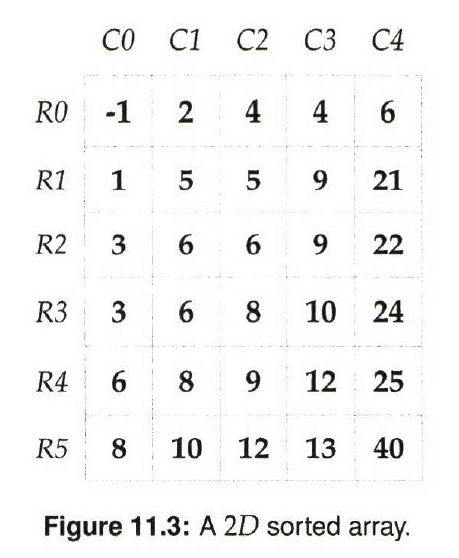

In [10]:
def search_2d_sorted(A, x):
    n, m = len(A), len(A[0])
    row, col = 0, m-1
    while row < n and 0 <= col:
        if A[row][col] > x:
            col -= 1
        elif A[row][col] < x:
            row += 1
        else:
            return True
    return False
A = [
    [-1, 2, 4, 4, 6],
    [1, 5, 5, 9, 21],
    [3, 6, 8, 10, 14],
    [6, 8, 9, 12, 25],
    [8, 10, 12, 13, 40]
]
search_2d_sorted(A, 12)

True

## Find kth largest element in an array

In [8]:
def klargest(A, k): # T: O(nlgn)
    A.sort()
    n = len(A)
    return A[n-k]
klargest([1,2,3,4,5,6],3)

1
3


In [12]:
def klargest(A, k): # T: O(nlgk)
    """Maintaing a minheap of length k and topmost element will always be kth largest."""
    from itertools import islice
    import heapq
    min_heap = []
    for x in islice(A, k):
        heapq.heappush(min_heap, x)
    for i in range(k, len(A)):
        heapq.heappushpop(min_heap, A[i])
    return min_heap[0]

klargest([3,2,1,4,5],3)

3

### Optimized approach
In this approach, we are using dividing the array using a pivot. So, before that pivot we'll have larger elements and after pivot we'll have elements equal to or less than the pivot.
Now, using binary search we can have one middle element or we can have a random element. Now, if no. if elements before pivot is k-1 then it is the answer. If no of elements are less than k-1 then we can discard, the elements before pivot or else discard the elements after the pivot.

* Why l <= r and not l < r?
    * we have to provide the the answer in while loop only. So, l==r have to be there as it is possible. Think about it.
* what if we don't use left, right in pivot_partition?
    * Time complexity will be O(nlgn)
    * this case will fail [2,2], k=2. As in while loop pivot_partition will return 0 again and again and we're stuck in while loop.

Time Complexity: O(n)
total time: n + n/2 + n/4 + n/8 + ... = 2n

Space Compexity: O(1)

In [31]:
def klargest(A, k):
    import random
    def pivot_partition(left, right, pivot):
        pivot_elem = A[pivot]
        A[left], A[pivot] = A[pivot], A[left]
        j = 0
        for i in range(left+1, right+1):
            if A[i] > A[j]:
                j += 1
                A[i], A[j] = A[j], A[i]
        A[left], A[j] = A[j], A[left]
        return j
    l, r = 0, len(A)-1
    while l <= r:
        pivot_idx = random.randint(l, r)
        # OR 
        # pivot_idx = (l+r)//2
        new_pivot = pivot_partition(l, r, pivot_idx)
        
        if new_pivot == k-1:
            return A[new_pivot]
        elif new_pivot < k-1:
            l = new_pivot+1
        else:
            r = new_pivot-1
klargest([1,2,3,4,5],2)

4

# Find the missing IP Address
We're given a file and we have to find what IP addresses are missing in the range 0.0.0.0 to 255.255.255.255. From the file. File is rather big and is stored on disk. So, we have to work with streams of data.

* One way is to sort the file and then go through the file sequentially and find the missing IPs. But the problem with this we need some storage on disk in order to sort the file as it is too big. So, it is going to be very slow.

* Another approach is to use hashtable for all $2^{32}$ IPs. Now, we'll go through hashtable and print the entries with 0 count. It will require at least 4 gigs of ram.

* More Optimized is to count no. of IPs starting with 0 and no of IPs starting with 1. Atleast one of them is going to have less than $2^{31}$ IPs. It's going to take 32 passes through the file.

* Since we have more storage, we can perform count on group of bits instead of only 1 bit like previous one. We can perform count on first 16 bits and if any of them have less than $2^{16}$ number of IPs. Then on second pass we'll focus only on those numbers whose leading 16 bits match the one in which there are less number of IPs.

In [39]:
def find_missing_element(stream):
    NUM_BUCKET = 1 << 16
    counter = [0] * NUM_BUCKET
    
    # count number of ips in each bucket
    for ip in stream:
        counter[ip >> 16] += 1
        
    # buckets with ip less than 2^16
    BUCKET_CAPACITY = 1 << 16
    candidates = [0] * BUCKET_CAPACITY
    candidate_bucket = next(i for i, c in enumerate(counter) if c < BUCKET_CAPACITY)
    
    # converting all the present ip in candidates to 1
    for ip in stream:
        if (ip >> 16) == candidate_bucket:
            lower_16 = ((1<<16)-1) & ip
            candidates[ip] = 1
    
    # now missing ips ones will be zero in candidate
    for i, v in enumerate(candidate):
        if v == 0:
            return (candidate_bucket << 16) | i # reconstructing the ip

# Find the duplicate and missing elements

In [8]:
def duplicate_and_missing(A):
    n = len(A)
    sm = n*(n-1)//2
    diff = sm - sum(A)
    st = set(A)
    for i in st:
        if i-diff >= 0 and i-diff not in st:
            return i, i-diff
        if i+diff < n and i+diff not in st:
            return i, i+diff

duplicate_and_missing([0,1,2,2,3,4])

(2, 5)

In [9]:
def duplicate_and_missing(A):
    from functools import reduce
    miss_XOR_dup = reduce(lambda v, i: v ^ i[0] ^ i[1], enumerate(A), 0)
    differ_bit, miss_or_dup = miss_XOR_dup & (~(miss_XOR_dup - 1)), 0
    for i, a in enumerate(A):
        if i & differ_bit:
            miss_or_dup ^= i
        if a & differ_bit:
            miss_or_dup ^= a
    if miss_or_dup in A:
        return miss_or_dup, miss_or_dup^miss_XOR_dup
    return miss_or_dup^miss_XOR_dup, miss_or_dup
duplicate_and_missing([0,1,2,2,3,4])

(2, 5)

We have to find duplicate and missing numbers. Now, when we xor all the elements of array and all the numbers from 0 to n-1 what we're left with is the xor of missing number and a duplicate number. 1s in resulting xor will tell us where their bits differ. It is gauranteed to have atleast one "1" as duplicate and missing bit can't be same. We can say that out of missing and duplicate number one is going to have a set bit at that place. Now, we xor all the elements of the array which have set bit at that place and also xor the numbers between 0 and n-1 inclusive who also have set bit at that place. Now, the resulting number is going to be either missing or duplicate. Now, we can traverse through array and see if that number is missing one or duplicate one. Now Xoring the resulting number with the xor of all elements of array and all numbers between 0 and n-1 will give the other one in the pair of missing and duplicate.